In [ ]:
!pip install qiskit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 39.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 44.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.5/241.5 KB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 KB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.5/129.5 KB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 KB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 68.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 KB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.5/37.5 MB 17.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 KB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.7/112.7 

In [ ]:
from qiskit import QuantumCircuit, Aer, assemble, execute
import numpy as np
from qiskit.visualization import plot_histogram, plot_bloch_multivector

In [ ]:
qc = QuantumCircuit(2,2)

#QISKIT syntax for CNOT
qc.cx(0,1)  
#SYNTAX: qc.(conrtol qubit, target qubit)

# See the circuit:
qc.draw()


q_0: ──■──
     ┌─┴─┐
q_1: ┤ X ├
     └───┘
c: 2/═════

In [ ]:
qc = QuantumCircuit(3,2)

#QISKIT syntax for Toffoli 
qc.ccx(0,1,2) 
#SYNTAX: qc.(conrtol qubit, conrtol qubit, target qubit)

# See the circuit:
qc.draw()

q_0: ──■──
       │  
q_1: ──■──
     ┌─┴─┐
q_2: ┤ X ├
     └───┘
c: 2/═════

In [ ]:
"""
From Qiskit textbook: Section 2.4
      The Toffoli gate is a three-qubit gate with two controls and one target. 
      It performs an X on the target only if both controls are in the state |1⟩. 
      The final state of the target is then equal to either the AND or the NAND of the two controls, 
      depending on whether the initial state of the target was |0⟩ or |1⟩. 
      A Toffoli can also be thought of as a controlled-controlled-NOT, 
      and is also called the CCX gate.

In thie above circuit, q2 is the target (q0, q1 are the controls). 
It should be clear that CCX is unitary and, hence, reversible:
  |q2  q1  q0> ||  |q2'  q1'  q0'>
  0   0   0    ||  0    0    0
  0   0   1    ||  0    0    1
  0   1   0    ||  0    1    0
  0   1   1    ||  1    1    1
  1   0   0    ||  1    0    0
  1   0   1    ||  1    0    1
  1   1   0    ||  1    1    0
  1   1   1    ||  0    1    1

If |q2> == |0> ==> |q2'> = |q1 and q0>
If |q2> == |1>  ==> |q1 nand q0>
"""

"\nFrom Qiskit textbook: Section 2.4\n      The Toffoli gate is a three-qubit gate with two controls and one target. \n      It performs an X on the target only if both controls are in the state |1⟩. \n      The final state of the target is then equal to either the AND or the NAND of the two controls, \n      depending on whether the initial state of the target was |0⟩ or |1⟩. \n      A Toffoli can also be thought of as a controlled-controlled-NOT, \n      and is also called the CCX gate.\n\nIn thie above circuit, q2 is the target (q0, q1 are the controls). \nIt should be clear that CCX is unitary and, hence, reversible:\n  |q2  q1  q0> ||  |q2'  q1'  q0'>\n  0   0   0    ||  0    0    0\n  0   0   1    ||  0    0    1\n  0   1   0    ||  0    1    0\n  0   1   1    ||  1    1    1\n  1   0   0    ||  1    0    0\n  1   0   1    ||  1    0    1\n  1   1   0    ||  1    1    0\n  1   1   1    ||  0    1    1\n\nIf |q2> == |0> ==> |q2'> = |q1 and q0>\nIf |q2> == |1>  ==> |q1 nand q0>\n"

In [ ]:
qc = QuantumCircuit(3,3)

#use the X gates to toggle the input qubit values
xinput = [1,1,1]  #vary these input values for all 4 cases   
if xinput[2] == 1:
  qc.x(0)
if xinput[1] == 1:
  qc.x(1)
if xinput[0] == 1:
  qc.x(2)
qc.barrier()

qc.ccx(0,1,2)    #QC Toffoli gate

qc.barrier()
qc.measure(0,0) # measure the control value
qc.measure(1,1) # measure the control value
qc.measure(2,2) # measure the target value

# See the circuit:
qc.draw()

┌───┐ ░       ░ ┌─┐      
q_0: ┤ X ├─░───■───░─┤M├──────
     ├───┤ ░   │   ░ └╥┘┌─┐   
q_1: ┤ X ├─░───■───░──╫─┤M├───
     ├───┤ ░ ┌─┴─┐ ░  ║ └╥┘┌─┐
q_2: ┤ X ├─░─┤ X ├─░──╫──╫─┤M├
     └───┘ ░ └───┘ ░  ║  ║ └╥┘
c: 3/═════════════════╩══╩══╩═
                      0  1  2

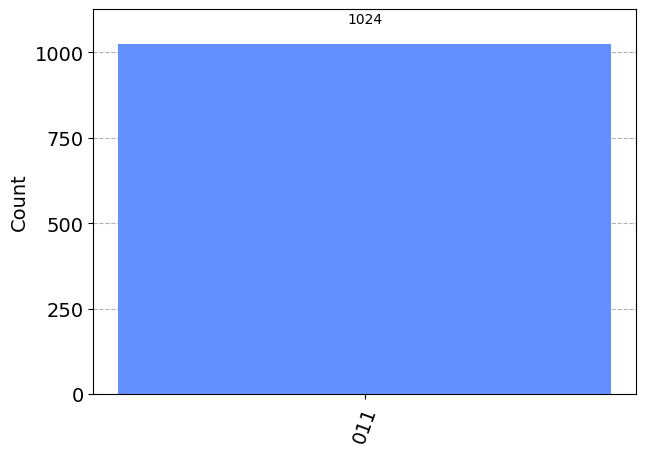

In [ ]:
backend = Aer.get_backend('qasm_simulator')
counts = execute(qc,backend).result().get_counts()
plot_histogram(counts)

In [ ]:
#quantum half adder 

qc_ha = QuantumCircuit(4,2)
# encode inputs in qubits 0 and 1
#use the X gates to toggle the input qubit values
xinput = [1,0]  #vary these input values for all 4 cases   
if xinput[1] == 1:
  qc_ha.x(0)
if xinput[0] == 1:
  qc_ha.x(1)
qc_ha.barrier()

# use cnots to write the XOR of the inputs on qubit 2
qc_ha.cx(0,2)
qc_ha.cx(1,2)
# use ccx to write the AND of the inputs on qubit 3
qc_ha.ccx(0,1,3)
qc_ha.barrier()
# extract outputs
qc_ha.measure(2,0) # extract XOR value
qc_ha.measure(3,1) # extract AND value

qc_ha.draw()

░                 ░       
q_0: ──────░───■─────────■───░───────
     ┌───┐ ░   │         │   ░       
q_1: ┤ X ├─░───┼────■────■───░───────
     └───┘ ░ ┌─┴─┐┌─┴─┐  │   ░ ┌─┐   
q_2: ──────░─┤ X ├┤ X ├──┼───░─┤M├───
           ░ └───┘└───┘┌─┴─┐ ░ └╥┘┌─┐
q_3: ──────░───────────┤ X ├─░──╫─┤M├
           ░           └───┘ ░  ║ └╥┘
c: 2/═══════════════════════════╩══╩═
                                0  1

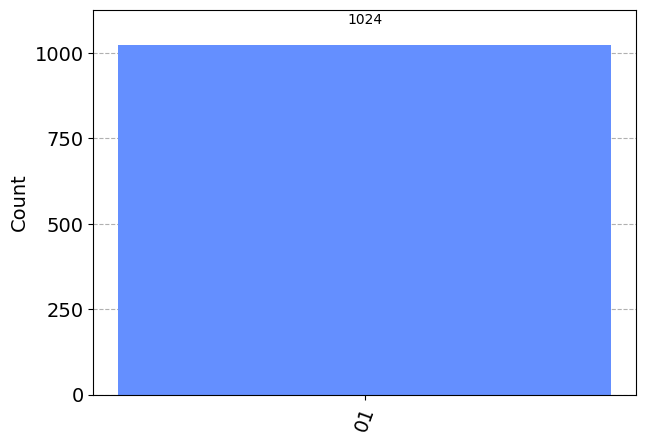

In [ ]:
backend = Aer.get_backend('qasm_simulator')
counts = execute(qc_ha,backend).result().get_counts()
plot_histogram(counts)